In [1]:
import pandas as  pd

data = pd.read_csv ('data.csv')

print(data.head())

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness

In [5]:
# fokus ke perimeter_mean
# Mean
mean_value = data['perimeter_mean'].mean() 
print('Mean:', mean_value)
# Median
median_value = data['perimeter_mean'].median()
print('Median:', median_value)
# Mode
mode_value = data['perimeter_mean'].mode() [0]
print('Mode:', mode_value)

Mean: 91.96903339191564
Median: 86.24
Mode: 82.61


In [7]:
# Range
range_value = data['perimeter_mean'].max() - data['radius_mean'].min()
print('Range:', range_value)
# Variance
variance_value = data['perimeter_mean'].var()
print('Variance:', variance_value)
# Standard Deviation
std_dev_value = data['perimeter_mean'].std()
print('Standard Deviation:', std_dev_value)

Range: 181.519
Variance: 590.44047952177
Standard Deviation: 24.2989810387549


In [9]:
# Range
range_value = data['perimeter_mean'].max() - data['perimeter_mean'].min()
print('Range:', range_value)
# Variance
variance_value = data['perimeter_mean'].var()
print('Variance:', variance_value)
# Standard Deviation
std_dev_value = data['perimeter_mean'].std()
print('Standard Deviation:', std_dev_value) #

Range: 144.71
Variance: 590.44047952177
Standard Deviation: 24.2989810387549


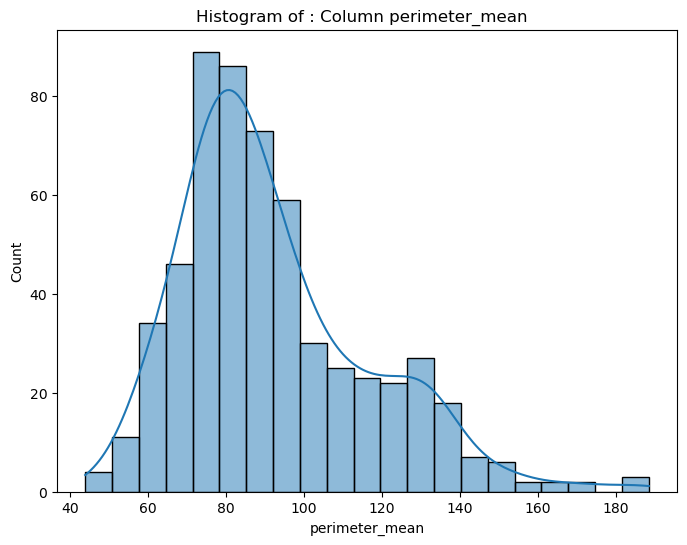

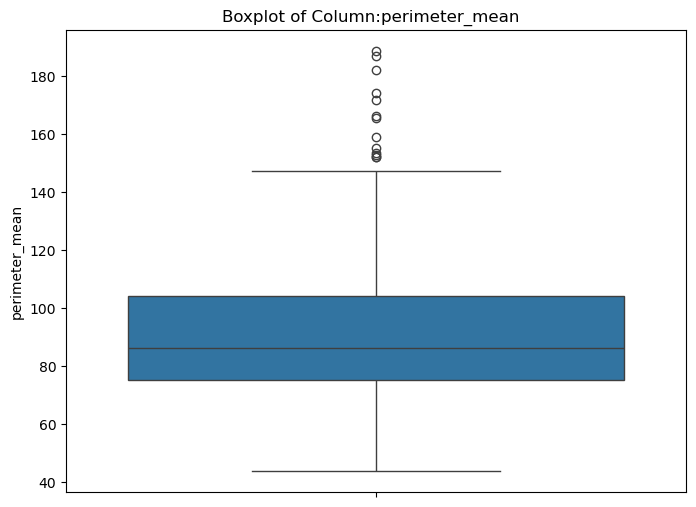

In [41]:
#1. Histogram menunjukkan distribusi frekuensi dari nilai-nilai dalam dataset.
#2. Boxplot menunjukkan median, kuartil, dan outliers dalam data.
import matplotlib.pyplot as plt
import seaborn as sns
# Histogram
plt.figure(figsize=(8,6))
sns.histplot(data['perimeter_mean'], kde=True)
plt.title('Histogram of : Column perimeter_mean  ')
plt.show()
# Boxplot
plt.figure(figsize=(8,6))
sns.boxplot(data=data['perimeter_mean'])
plt.title('Boxplot of Column:perimeter_mean  ')
plt.show()

In [13]:
#Persentil dan Kuartil
#Persentil adalah nilai yang membagi data menjadi 100 bagian.
#Kuartil adalah nilai yang membagi data menjadi empat bagian, #yaitu kuartil pertama (Q1), median (Q2), dan kuartil ketiga (Q3). # Percentile
percentile_25 = data['perimeter_mean'].quantile (0.25)
percentile_50 = data['perimeter_mean'].quantile (0.50) # Median
percentile_75 = data['perimeter_mean'].quantile(0.75)
print(f'25th Percentile (Q1): (percentile_25)')
print(f'50th Percentile (Median): (percentile_50)')
print(f'75th Percentile (Q3): (percentile_75)')

25th Percentile (Q1): (percentile_25)
50th Percentile (Median): (percentile_50)
75th Percentile (Q3): (percentile_75)


In [15]:
# Korelasi
correlation = data[['radius_mean', 'perimeter_mean']].corr()
print('Correlation:\n', correlation)
# Covariance
covariance = data[['radius_mean', 'perimeter_mean']].cov()
print('Covariance:\n', covariance)

Correlation:
                 radius_mean  perimeter_mean
radius_mean        1.000000        0.997855
perimeter_mean     0.997855        1.000000
Covariance:
                 radius_mean  perimeter_mean
radius_mean       12.418920       85.447142
perimeter_mean    85.447142      590.440480


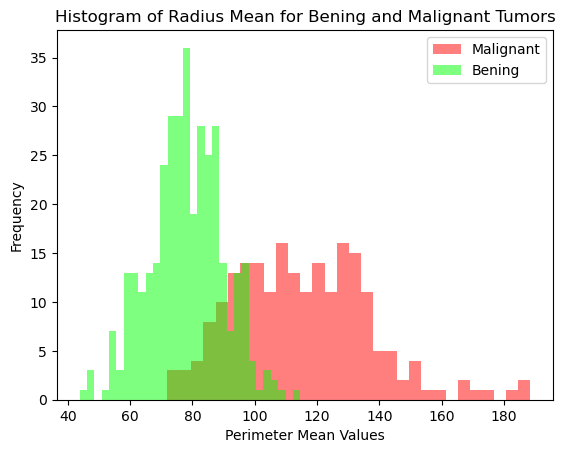

Most frequent malignant radius mean is:  106.88


In [17]:
m = plt.hist(data[data["diagnosis"] == "M"].perimeter_mean  , bins=30, fc=(1, 0, 0, 0.5), label="Malignant")
b = plt.hist(data[data["diagnosis"] == "B"].perimeter_mean  , bins=30, fc=(0, 1, 0, 0.5), label="Bening")
plt.legend()
plt.xlabel("Perimeter Mean Values")
plt.ylabel("Frequency")
plt.title("Histogram of Radius Mean for Bening and Malignant Tumors")
plt.show()

# Menemukan radius mean paling sering untuk malignant
frequent_malignant_radius_mean = m[0].max()
index_frequent_malignant_radius_mean = list(m[0]).index(frequent_malignant_radius_mean)
most_frequent_malignant_radius_mean = m[1][index_frequent_malignant_radius_mean]

print("Most frequent malignant radius mean is: ", most_frequent_malignant_radius_mean)

In [ ]:
index_frequent_malignant_radius_mean = list(m[0]).index(frequent_malignant_radius_mean)
most_frequent_malignant_radius_mean = m [1] [index_frequent_malignant_radius_mean] 
print("Most frequent malignant radius mean is: ", most_frequent_malignant_radius_mean)

In [21]:
data_bening = data [data["diagnosis"] == "B"]
data_malignant = data [data ["diagnosis"] == "M"]
desc_b = data_bening.perimeter_mean  .describe()
desc_m = data_malignant.perimeter_mean  .describe()
desc_b,desc_m

(count    357.000000
 mean      78.075406
 std       11.807438
 min       43.790000
 25%       70.870000
 50%       78.180000
 75%       86.100000
 max      114.600000
 Name: perimeter_mean, dtype: float64,
 count    212.000000
 mean     115.365377
 std       21.854653
 min       71.900000
 25%       98.745000
 50%      114.200000
 75%      129.925000
 max      188.500000
 Name: perimeter_mean, dtype: float64)

In [23]:
#Khusus Benign
Q1 = desc_b[4] #25%
Q3 = desc_b[6] #75%
IQR = Q3-Q1  #jarak antara 25% dengan 75%
lower_bound = Q1 - 1.5*IQR #hitung Lower bound
upper_bound = Q3 + 1.5*IQR #hitung upper bound
print("Apapun data outside this range adalah outlier: (", lower_bound,",", upper_bound,")") 
data_bening [data_bening.perimeter_mean   < lower_bound].perimeter_mean  
print("Outliernya: ", data_bening[ (data_bening.perimeter_mean   < lower_bound) |
       (data_bening.perimeter_mean   > upper_bound)].perimeter_mean .values)

Apapun data outside this range adalah outlier: ( 48.02500000000002 , 108.94499999999998 )
Outliernya:  [ 43.79 114.6   47.98  47.92]


C:\Users\NASWA\AppData\Local\Temp\ipykernel_11072\3941980725.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Q1 = desc_b[4] #25%
C:\Users\NASWA\AppData\Local\Temp\ipykernel_11072\3941980725.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Q3 = desc_b[6] #75%


     diagnosis        variable   value
0            M     radius_mean   17.99
1            M     radius_mean   20.57
2            M     radius_mean   19.69
3            M     radius_mean   11.42
4            M     radius_mean   20.29
...        ...             ...     ...
1133         M  perimeter_mean  142.00
1134         M  perimeter_mean  131.20
1135         M  perimeter_mean  108.30
1136         M  perimeter_mean  140.10
1137         B  perimeter_mean   47.92

[1138 rows x 3 columns]


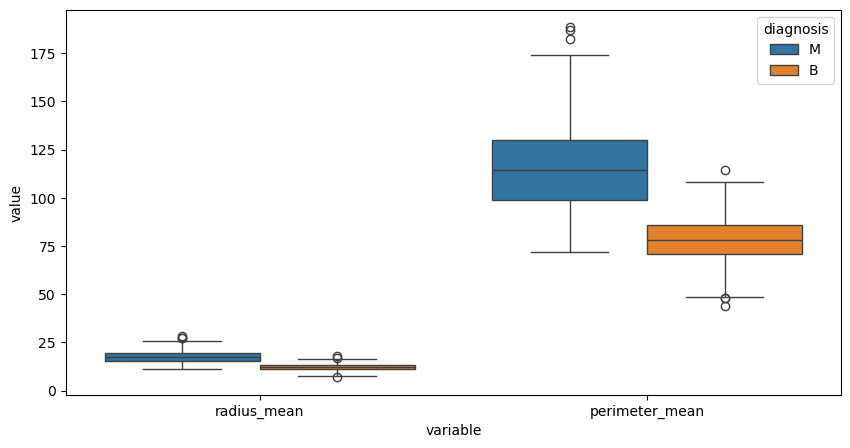

In [39]:
melted_data = pd.melt(data, id_vars = "diagnosis", value_vars = ['radius_mean', 'perimeter_mean'])
print(melted_data)
plt.figure(figsize = (10,5))
sns.boxplot(x = "variable", y = "value", hue="diagnosis", data= melted_data)
plt.show()

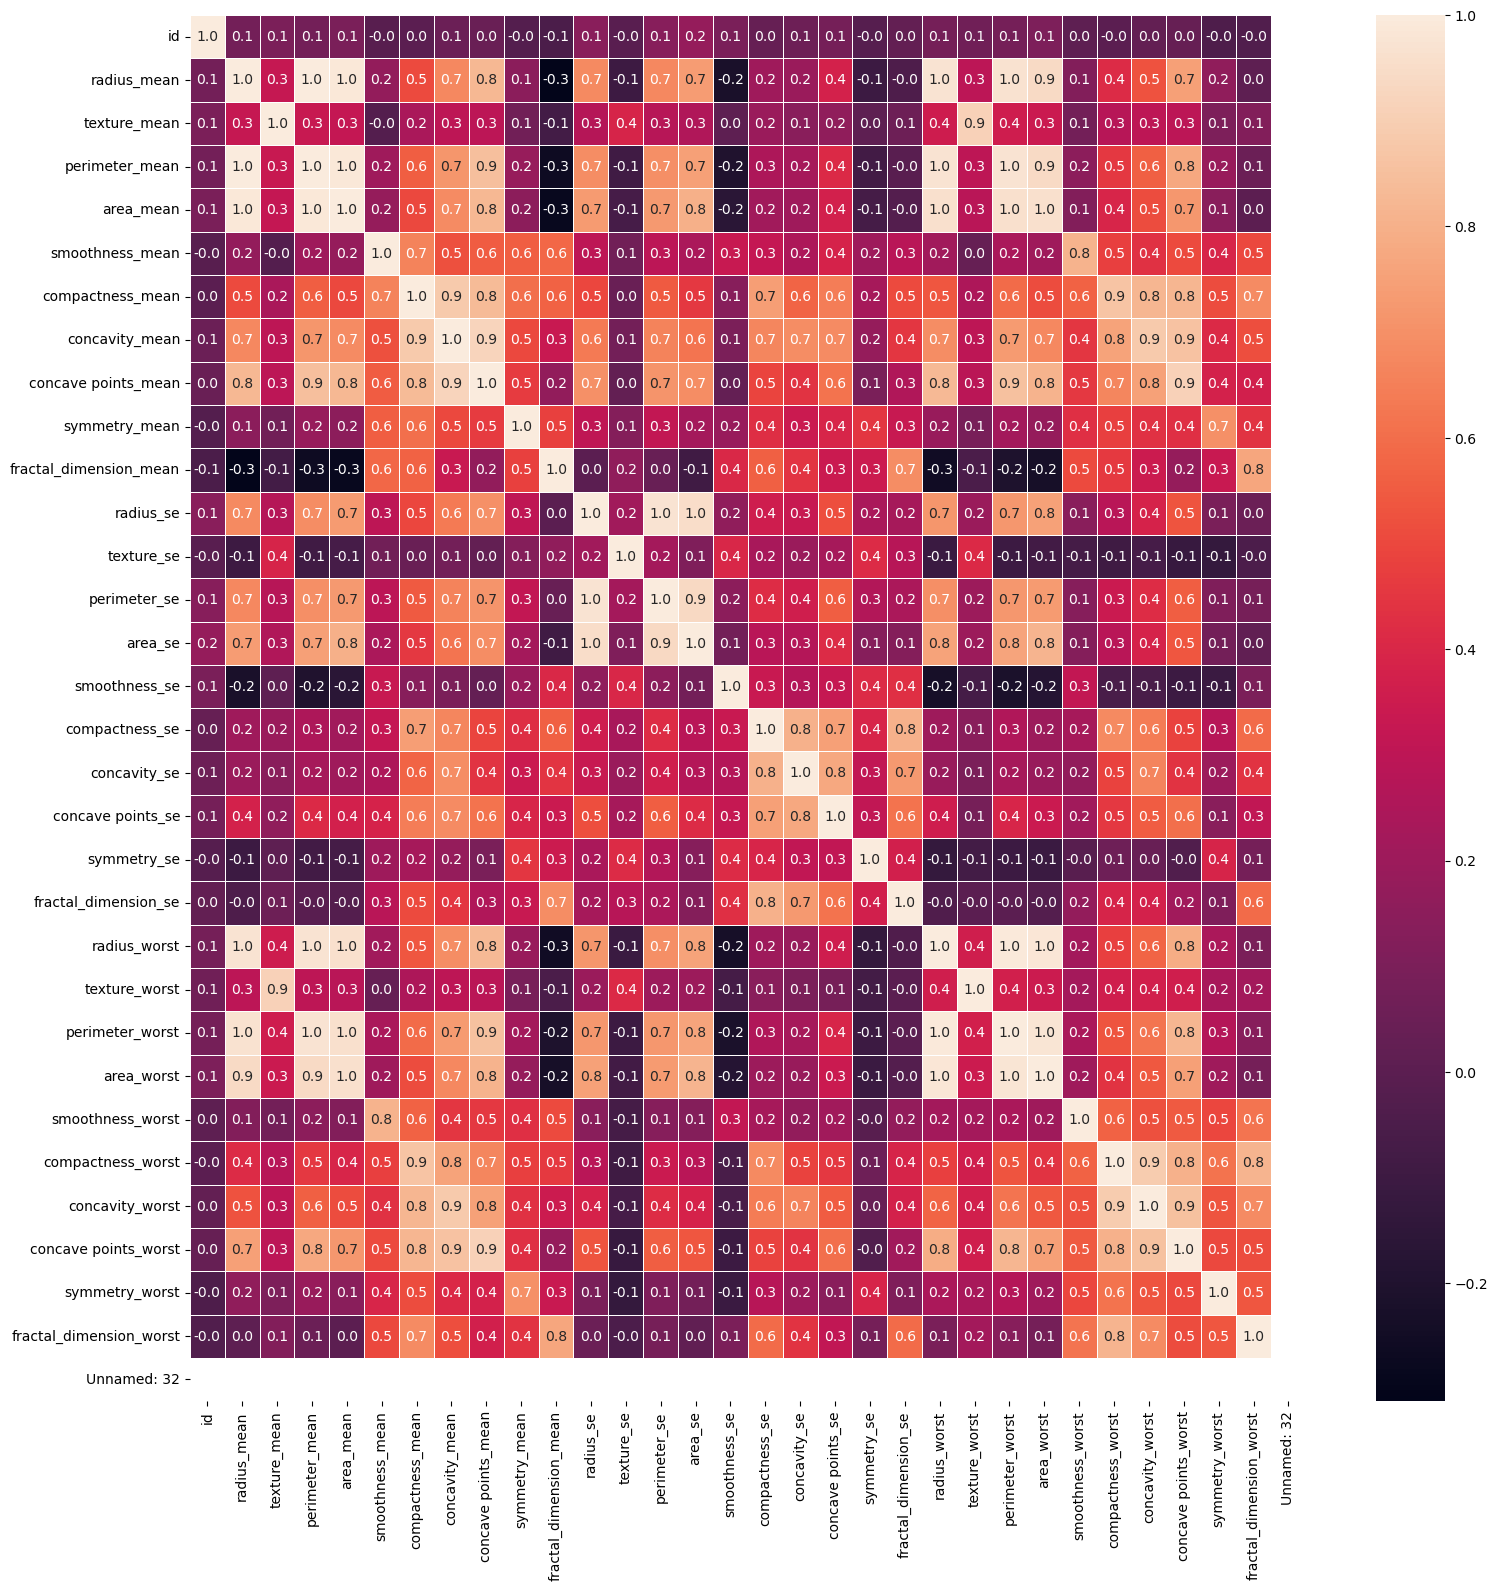

In [31]:
# Hanya memilih kolom numerik
numerical_data = data.select_dtypes (include=['float64', 'int64'])
# Menghitung korelasi dan membuat heatmap
f, ax = plt.subplots (figsize=(18, 18))
sns.heatmap(numerical_data.corr(), annot=True, linewidths=0.5, fmt=".1f", ax=ax)
plt.xticks(rotation=90)
plt.yticks (rotation=0)
plt.show()

In [35]:
p1= data.loc[:, ["perimeter_mean", "radius_mean"]].corr(method= "pearson")
p2 = data.radius_mean.cov(data.area_mean)/(data.radius_mean.std()*data.area_mean.std())
print('Pearson correlation:')
print(p1)
print('Pearson correlation: ',p2)

Pearson correlation:
                perimeter_mean  radius_mean
perimeter_mean        1.000000     0.997855
radius_mean           0.997855     1.000000
Pearson correlation:  0.9873571700566132


In [37]:
ranked_data = data.rank()
print(ranked_data)
spearman_corr = ranked_data.loc[:, ["perimeter_mean", "radius_mean"]].corr(method= "pearson")
print("Spearman's correlation: ")
print(spearman_corr)

        id  diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0     42.0      463.5        476.5           2.0           492.0      478.0   
1     43.0      463.5        540.0         223.0           528.5      544.0   
2    489.0      463.5        519.0         396.5           517.5      516.0   
3    490.0      463.5        118.0         364.0           173.0      100.0   
4    491.0      463.5        532.0          64.0           539.0      537.0   
..     ...        ...          ...           ...             ...        ...   
564  382.0      463.5        552.0         453.0           550.0      553.0   
565  383.0      463.5        526.0         554.0           524.0      529.0   
566  384.0      463.5        446.0         549.0           442.0      447.0   
567  385.0      463.5        543.0         558.0           547.0      532.0   
568   41.0      179.0          4.0         503.0             2.0        4.0   

     smoothness_mean  compactness_mean  concavity_m